In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
ECG_data = pd.read_csv('data/ECG5000/supervised/ECG_data.csv')

In [3]:
x = ECG_data.drop(columns=['label', 'set']).values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [4]:
finalDf = pd.concat([principalDf, ECG_data[['label']]], axis = 1)

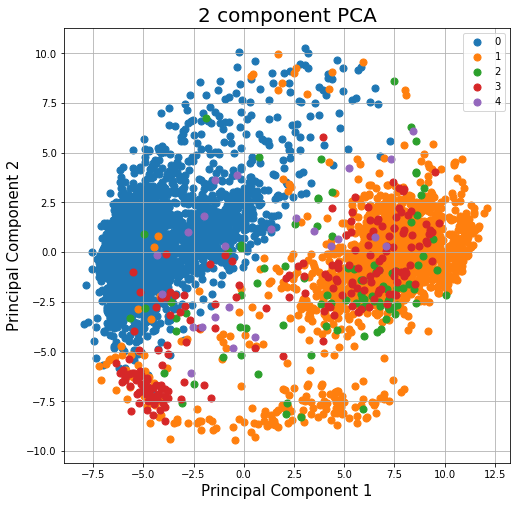

In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1, 2, 3, 4]
# colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
for target in targets:
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'], 
               s = 50)
ax.legend(targets)
ax.grid()